In [1]:
pip install category_encoders

     |████████████████████████████████| 80 kB 5.3 MB/s 


In [2]:
pip install pdpbox

     |████████████████████████████████| 34.0 MB 35 kB/s 
     |████████████████████████████████| 13.1 MB 6.7 kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758225 sha256=7dab6ec1a57e0b509565c8c860bf4be812763f32c051281c341393eee2459af4
  Stored in directory: /root/.cache/pip/wheels/f4/d0/1a/b80035625c53131f52906a6fc4dd690d8efd2bf8af6a4015eb
Successfully built pdpbox
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [3]:
pip install shap

     |████████████████████████████████| 356 kB 7.0 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491657 sha256=693d40c4dd4acc0ff1aed75f1d12a41369912685893cfdc4a8788e0d28c50183
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab import files
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint, uniform
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn.preprocessing import StandardScaler
from category_encoders import TargetEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
uploaded = files.upload()

Saving movie4.csv to movie4.csv


In [7]:
df = pd.read_csv('movie4.csv')

In [ ]:
df.head()

budget  popularity       revenue  ...  actor_A  actor_B  actor_C
0  237000000.0  150.437577  2.787965e+09  ...      1.0      4.0      1.0
1  300000000.0  139.082615  9.610000e+08  ...      1.0      4.0      1.0
2  245000000.0  107.376788  8.806746e+08  ...      0.0      3.0      3.0
3  250000000.0  112.312950  1.084939e+09  ...      0.0      6.0      0.0
4  260000000.0   43.926995  2.841391e+08  ...      1.0      3.0      2.0

[5 rows x 20 columns]

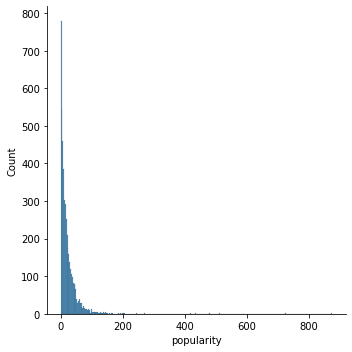

In [8]:
target = 'popularity'
sns.displot(df[target]);

In [9]:
df['popularity'] = df[df['popularity'] < np.percentile(df['popularity'], 99.5)]['popularity']


In [10]:
plots=pd.DataFrame()
plots['original']=df[target]
plots['transformed']=np.log1p(df[target])
plots['backToOriginal']=np.expm1(np.log1p(df[target]))

fig, ax = plt.subplots(1,3,figsize=(15,5))
sns.histplot(plots['original'], ax=ax[0]);
sns.histplot(plots['transformed'], ax=ax[1]);
sns.histplot(plots['backToOriginal'], ax=ax[2]);

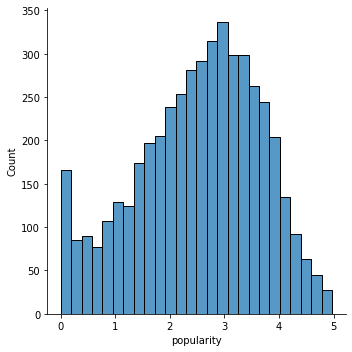

In [11]:
log_popul = np.log1p(df['popularity'])
df["popularity"] = log_popul
sns.displot(log_popul)

In [12]:
def f1(x):
  if x == 0:
    b = np.nan
  else:
    b= x
  return b

In [13]:
df['vote_average']= df['vote_average'].apply(f1)

df= df.drop(['vote_count'], axis = 1)

In [14]:
df = df[df[target].notna()]

In [15]:
df

budget  popularity       revenue  ...  actor_A  actor_B  actor_C
1     300000000.0    4.942232  9.610000e+08  ...      1.0      4.0      1.0
2     245000000.0    4.685614  8.806746e+08  ...      0.0      3.0      3.0
3     250000000.0    4.730153  1.084939e+09  ...      0.0      6.0      0.0
4     260000000.0    3.805039  2.841391e+08  ...      1.0      3.0      2.0
5     258000000.0    4.759605  8.908716e+08  ...      0.0      6.0      0.0
...           ...         ...           ...  ...      ...      ...      ...
4761     220000.0    2.725876  2.040920e+06  ...      0.0      0.0      6.0
4762       9000.0    0.496251           NaN  ...      0.0      1.0      4.0
4763          NaN    0.893831           NaN  ...      0.0      1.0      5.0
4764          NaN    0.618967           NaN  ...      0.0      1.0      4.0
4765          NaN    1.074962           NaN  ...      1.0      2.0      3.0

[4742 rows x 19 columns]

In [16]:
train, test = train_test_split(df, test_size=0.2, random_state=2)
train1= train
train, val = train_test_split(train, test_size =0.2, random_state = 2 )

In [17]:
features = train.drop(columns=[target]).columns

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

In [18]:
X_train1 = train1[features]
y_train1= train1[target]

In [ ]:
predict = df['vote_average'].mean()
errors = predict - df['vote_average']

In [ ]:
errors

1      -0.727962
2      -0.127962
3      -1.427962
4       0.072038
5       0.272038
          ...   
4761   -0.427962
4762    0.272038
4763   -0.827962
4764    0.472038
4765   -0.127962
Name: vote_average, Length: 4742, dtype: float64

In [ ]:
mean_absolute_error = errors.abs().mean()
mean_absolute_error

0.7394975322127856

In [ ]:
predict = y_train1.mean()
predict

2.4997832930012094

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4742 entries, 1 to 4765
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   budget            3738 non-null   float64
 1   popularity        4742 non-null   float64
 2   revenue           3351 non-null   float64
 3   runtime           4742 non-null   float64
 4   spoken_languages  4742 non-null   int64  
 5   vote_average      4692 non-null   float64
 6   genres_1          4742 non-null   float64
 7   genres_2          4742 non-null   float64
 8   genres_3          4742 non-null   float64
 9   genres_4          4742 non-null   float64
 10  director_A        4742 non-null   float64
 11  director_B        4742 non-null   float64
 12  director_C        4742 non-null   float64
 13  company_A         4742 non-null   float64
 14  company_B         4742 non-null   float64
 15  company_C         4742 non-null   float64
 16  actor_A           4742 non-null   float64


In [ ]:
from sklearn.metrics import mean_absolute_error
y_pred = [predict] * len(y_train)
mae = mean_absolute_error(y_train, y_pred)

print(f'훈련 에러: {mae:.2f}')

훈련 에러: 0.93


In [ ]:
y_pred = [predict] * len(y_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'테스트 에러: {mae:.2f}')

테스트 에러: 0.90


#다중선형회귀

In [19]:
model = LinearRegression()
enc = OrdinalEncoder()
imp_mean = SimpleImputer()
scaler = StandardScaler()
X_train_encoded = enc.fit_transform(X_train)
X_train_imputed = imp_mean.fit_transform(X_train_encoded)
X_train_scaled = scaler.fit_transform(X_train_imputed)

X_val_encoded = enc.transform(X_val)
X_val_imputed = imp_mean.transform(X_val_encoded)
X_val_scaled = scaler.transform(X_val_imputed)

X_test_encoded = enc.transform(X_test)
X_test_imputed = imp_mean.transform(X_test_encoded)
X_test_scaled = scaler.transform(X_test_imputed)

model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_train_scaled)
mae = mean_absolute_error(y_train, y_pred)
print(f'훈련 에러: {mae:.2f}')
y_pred = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
print(f'테스트 에러: {mae:.2f}')

훈련 에러: 0.62
테스트 에러: 0.59


In [22]:
y_pred1 = model.predict(X_val_scaled)
r2_score(y_val, y_pred1)

0.5449272923406283

In [24]:
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mse ** 0.5
r2 =r2_score(y_test, y_pred)
mse,mae,rmse,r2
print('검증데이터 r2값', r2_score(y_val, y_pred1))
print('시험 데이터 r2값', r2)

검증데이터 r2값 0.5449272923406283
시험 데이터 r2값 0.5427061508629651


In [ ]:
pip update sklearn

ERROR: unknown command "update"


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import PolynomialFeatures

def RidgeRegression(degree=3, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), 
                         Ridge(**kwargs))
    
for alpha in [0.12, 0.4,0.45,0.5]:
        
    print(f'Ridge Regression, alpha={alpha}')

    # Ridge 모델 학습
    model = RidgeRegression(alpha=alpha, normalize=True)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # MAE for test
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'Test MAE: {mae:}')
    print(f'R2 Score: {r2:}\n')

coefs = model.named_steps["ridge"].coef_
print(f'Number of Features: {len(coefs)}')

Ridge Regression, alpha=0.12
Test MAE: 0.6014393493928587
R2 Score: 0.49051694466312123

Ridge Regression, alpha=0.4
Test MAE: 0.5888464394068975
R2 Score: 0.5271042900156324

Ridge Regression, alpha=0.45
Test MAE: 0.5891433428638017
R2 Score: 0.528482421986312

Ridge Regression, alpha=0.5
Test MAE: 0.5895963664288738
R2 Score: 0.5293852909866492

Number of Features: 1330


#트리모델

In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import TransformedTargetRegressor

pipe = make_pipeline(
    # TargetEncoder: 범주형 변수 인코더로, 타겟값을 특성의 범주별로 평균내어 그 값으로 인코딩
    TargetEncoder(), 
    SimpleImputer(), 
    StandardScaler(),
    DecisionTreeRegressor(max_depth =7)
)

pipe.fit(X_train, y_train)
print('검증 세트의 r2값', pipe.score(X_val, y_val))
print('시험 세트 r2값', pipe.score(X_test, y_test))

검증 세트의 r2값 0.6309420008525464
시험 세트 r2값 0.6143246207483805


/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
pipe.get_params().keys()

랜덤 포레스트

In [32]:
pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    StandardScaler(),
    RandomForestRegressor(random_state=0)
)

pipe.fit(X_train, y_train)
print('검증 세트의 r2값', pipe.score(X_val, y_val))
print('시험 세트 r2값', pipe.score(X_test, y_test))

검증 세트의 r2값 0.7201851259750907
시험 세트 r2값 0.6876907838207776


In [ ]:
print(pipe.score(X_val, y_val))
print(pipe.score(X_test, y_test))


0.7201851259750907
0.6876907838207776


In [ ]:
pipe.score(X_test, y_test)

0.6876907838207776

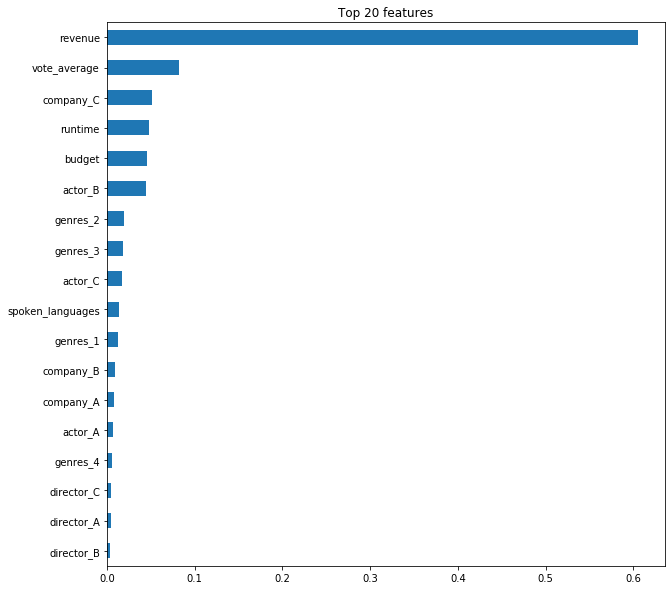

In [ ]:
rf = pipe.named_steps['randomforestregressor']
importances = pd.Series(rf.feature_importances_, X_train.columns)

%matplotlib inline
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh();

In [ ]:
pip install eli5

In [ ]:

from sklearn.pipeline import Pipeline
# encoder, imputer를 preprocessing으로 묶었습니다. 후에 eli5 permutation 계산에 사용합니다
pipe = Pipeline([
    ('preprocessing', make_pipeline(OrdinalEncoder(),StandardScaler(), SimpleImputer())),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=2, n_jobs=-1)) 
])
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessing',
                 Pipeline(memory=None,
                          steps=[('ordinalencoder',
                                  OrdinalEncoder(cols=[], drop_invariant=False,
                                                 handle_missing='value',
                                                 handle_unknown='value',
                                                 mapping=[], return_df=True,
                                                 verbose=0)),
                                 ('standardscaler',
                                  StandardScaler(copy=True, with_mean=True,
                                                 with_std=True)),
                                 ('simpleimputer',
                                  SimpleImputer(add_indicator=False, copy=T...
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                      

In [ ]:
from sklearn.metrics import mean_absolute_error

y_pred = pipe.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'테스트 에러: {mae:.2f}')


테스트 에러: 0.48


In [ ]:
from scipy.stats import randint, uniform

pipe = make_pipeline(
    TargetEncoder(), 
    SimpleImputer(),
    StandardScaler(),
    RandomForestRegressor(random_state=2)
)

dists = {
    'randomforestregressor__n_estimators': randint(200, 400), 
    'randomforestregressor__max_depth': [12,13,14, 15,16,17,18],
    'randomforestregressor__max_features': uniform(0, 1) # max_features
}

clf = RandomizedSearchCV(
    pipe, 
    param_distributions=dists, 
    n_iter=50, 
    cv=3, 
    scoring='neg_mean_absolute_error',  
    verbose=2,
    n_jobs=-1
)

clf.fit(X_train1, y_train1);

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  4.4min finished


In [ ]:
print('최적 하이퍼파라미터: ', clf.best_params_)
print('MAE: ', -clf.best_score_)

최적 하이퍼파라미터:  {'randomforestregressor__max_depth': 18, 'randomforestregressor__max_features': 0.5324649232304997, 'randomforestregressor__n_estimators': 290}
MAE:  0.4636870211176009


In [ ]:
from sklearn.metrics import mean_absolute_error
pipe = clf.best_estimator_
y_pred = pipe.predict(X_test)
r2_score(y_test, y_pred)

(0.4585332820085147, 0.7091558524605707)

In [46]:
from scipy.stats import randint, uniform

pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(),
    StandardScaler(),
    RandomForestRegressor(random_state=2)
)

dists = {
    'randomforestregressor__n_estimators': [250,254,255,256,257,258],
    'randomforestregressor__max_depth': [17,18,19,20,21],
    'randomforestregressor__min_samples_split':[3,4,5],
    'randomforestregressor__min_samples_leaf':[3,4,5]
}

clf = GridSearchCV(
    pipe, 
    param_grid=dists, 
    cv=3, 
    scoring='neg_mean_absolute_error',  
    verbose=1,
    n_jobs=-1
)

clf.fit(X_train1, y_train1);

Fitting 3 folds for each of 270 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 23.7min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed: 24.1min finished


In [47]:
print('최적 하이퍼파라미터: ', clf.best_params_)
print('MAE: ', -clf.best_score_)

최적 하이퍼파라미터:  {'randomforestregressor__max_depth': 17, 'randomforestregressor__min_samples_leaf': 3, 'randomforestregressor__min_samples_split': 3, 'randomforestregressor__n_estimators': 257}
MAE:  0.4681777483004834


In [48]:
from sklearn.metrics import mean_absolute_error
pipe = clf.best_estimator_
y_pred = pipe.predict(X_val)
print('검증 세트의 r2값',r2_score(y_val, y_pred))
y_pred = pipe.predict(X_test)
print('시험 세트 r2값', r2_score(y_test, y_pred))

검증 세트의 r2값 0.9082647186662438
시험 세트 r2값 0.7037865350813883


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbc = GradientBoostingRegressor(random_state=0,max_depth=3) # 기본값: max_depth=3, learning_rate=0.1

enc = OrdinalEncoder()
imp_mean = SimpleImputer()
scaler = StandardScaler()
X_train_encoded = enc.fit_transform(X_train1)
X_train_imputed = imp_mean.fit_transform(X_train_encoded)
X_train_scaled = scaler.fit_transform(X_train_imputed)

X_test_encoded = enc.transform(X_test)
X_test_imputed = imp_mean.transform(X_test_encoded)
X_test_scaled = scaler.transform(X_test_imputed)

gbc.fit(X_train_scaled, y_train1)
score_train = gbc.score(X_train_scaled, y_train1) # train set 정확도

print('{:.3f}'.format(score_train))



score_test = gbc.score(X_test_scaled, y_test) # 일반화 정확도

print('{:.3f}'.format(score_test))

0.767
0.708


In [ ]:
type(X_train_imputed)

numpy.ndarray

In [ ]:
features = df.columns.drop('popularity')
features

Index(['budget', 'revenue', 'runtime', 'spoken_languages', 'vote_average',
       'genres_1', 'genres_2', 'genres_3', 'genres_4', 'director_A',
       'director_B', 'director_C', 'company_A', 'company_B', 'company_C',
       'actor_A', 'actor_B', 'actor_C'],
      dtype='object')

In [ ]:
from xgboost import XGBClassifier
pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    XGBRegressor(n_estimators=200
                  , random_state=2
                  , n_jobs=-1
                  , max_depth=7
                  , learning_rate=0.2
                 )
)

pipe.fit(X_train, y_train);

[15:35:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:

from sklearn.metrics import accuracy_score
y_pred = pipe.predict(X_val)
print('검증 정확도: ', pipe.score(X_val, y_val))


검증 정확도:  0.6905727927109029


In [49]:
enc = OrdinalEncoder()
imp_mean = SimpleImputer()
scaler = StandardScaler()

X_train_imputed = imp_mean.fit_transform(X_train)
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_train_encoded = enc.fit_transform(X_train_imputed)
X_train_encoded.columns = features

X_val_imputed = imp_mean.transform(X_val)
X_val_scaled = scaler.transform(X_val_imputed)
X_val_encoded = enc.transform(X_val_imputed)
X_val_encoded.columns = features

X_test_imputed = imp_mean.transform(X_test)
X_test_scaled = scaler.transform(X_test_imputed)
X_test_encoded = enc.transform(X_test_imputed)
X_test_encoded.columns = features
boosting = XGBRegressor(
    n_estimators=1000,
    objective='reg:squarederror', # default
    learning_rate=0.2,
    n_jobs=-1
)

eval_set = [(X_train_encoded, y_train), 
            (X_val_encoded, y_val)]

boosting.fit(X_train_encoded, y_train, 
          eval_set=eval_set,
          early_stopping_rounds=50
         )

[0]	validation_0-rmse:1.89845	validation_1-rmse:1.8757
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:1.58226	validation_1-rmse:1.56208
[2]	validation_0-rmse:1.33986	validation_1-rmse:1.32407
[3]	validation_0-rmse:1.15663	validation_1-rmse:1.14306
[4]	validation_0-rmse:1.02012	validation_1-rmse:1.0112
[5]	validation_0-rmse:0.918148	validation_1-rmse:0.914545
[6]	validation_0-rmse:0.842014	validation_1-rmse:0.841624
[7]	validation_0-rmse:0.784074	validation_1-rmse:0.786164
[8]	validation_0-rmse:0.739755	validation_1-rmse:0.739036
[9]	validation_0-rmse:0.709874	validation_1-rmse:0.710038
[10]	validation_0-rmse:0.686776	validation_1-rmse:0.691818
[11]	validation_0-rmse:0.667441	validation_1-rmse:0.673622
[12]	validation_0-rmse:0.652954	validation_1-rmse:0.660457
[13]	validation_0-rmse:0.640154	validation_1-rmse:0.650699
[14]	validation_0-rmse:0.631593	valid

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.2, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=-1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
df.columns

Index(['budget', 'popularity', 'revenue', 'runtime', 'spoken_languages',
       'vote_average', 'genres_1', 'genres_2', 'genres_3', 'genres_4',
       'director_A', 'director_B', 'director_C', 'company_A', 'company_B',
       'company_C', 'actor_A', 'actor_B', 'actor_C'],
      dtype='object')

In [ ]:
X_val_encoded

budget       revenue  runtime  ...  actor_A  actor_B  actor_C
0    1.000000e+07  3.038770e+05    127.0  ...      0.0      0.0      6.0
1    2.000000e+07  6.678791e+07    127.0  ...      0.0      2.0      4.0
2    8.000000e+07  6.851484e+07     90.0  ...      0.0      3.0      3.0
3    1.200000e+08  3.632589e+08     95.0  ...      0.0      3.0      3.0
4    2.500000e+07  1.543681e+07    127.0  ...      0.0      6.0      0.0
..            ...           ...      ...  ...      ...      ...      ...
754  1.160000e+08  1.781278e+08    108.0  ...      0.0      1.0      5.0
755  1.500000e+07  6.999538e+07    216.0  ...      0.0      0.0      6.0
756  1.700000e+06  8.844595e+06     93.0  ...      0.0      0.0      6.0
757  3.565224e+07  1.125136e+08     86.0  ...      0.0      3.0      3.0
758  3.565224e+07  1.125136e+08    103.0  ...      0.0      5.0      1.0

[759 rows x 18 columns]

In [50]:
y_pred = boosting.predict(X_val_encoded)
print('R^2', r2_score(y_val, y_pred))
y_pred = boosting.predict(X_test_encoded)
print('R^2', r2_score(y_test, y_pred))

R^2 0.721280145256015
R^2 0.7178374143598553


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


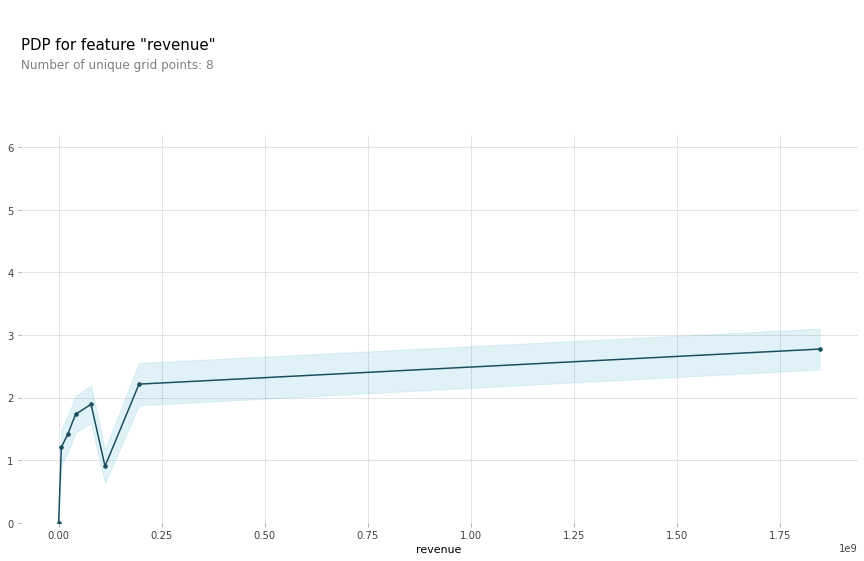

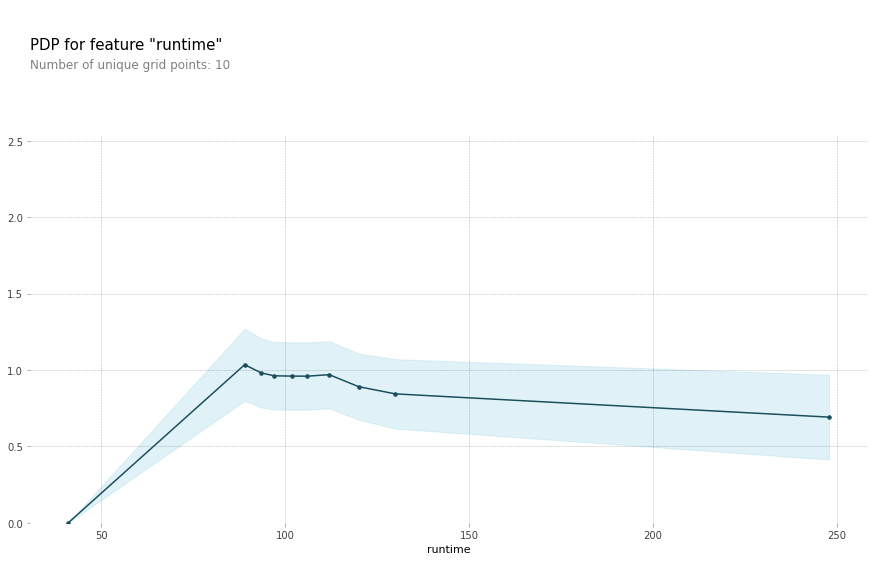

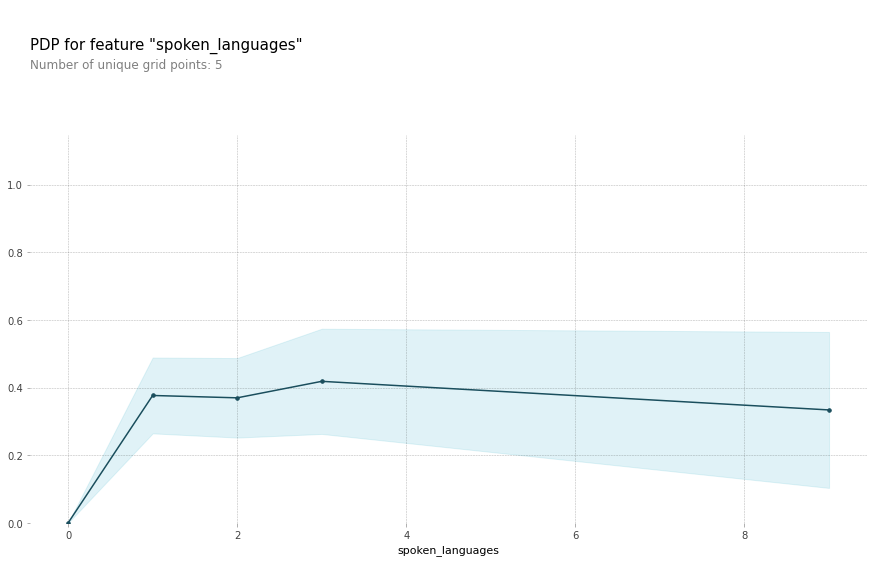

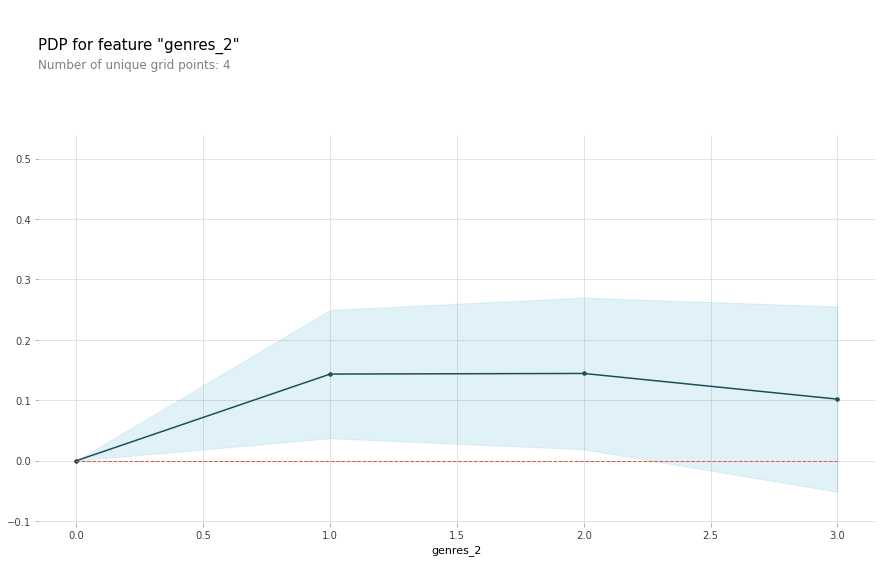

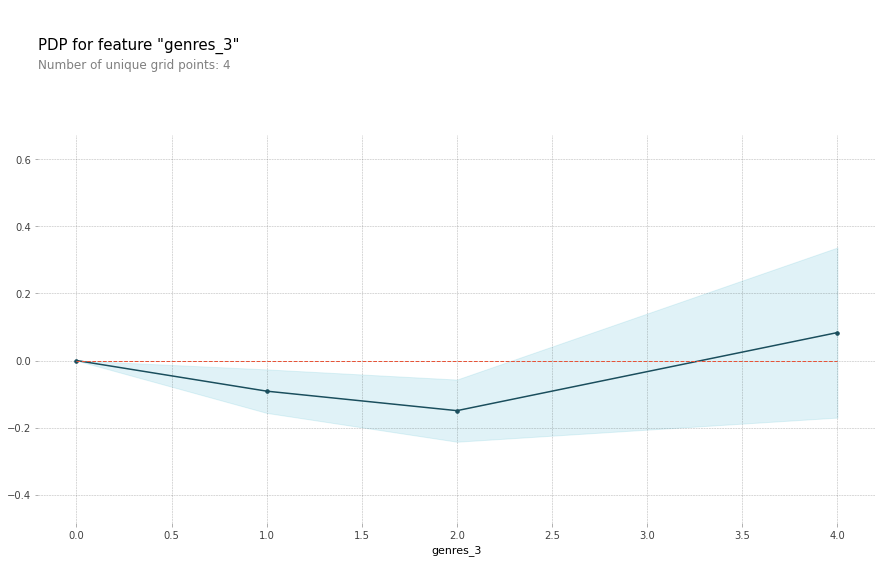

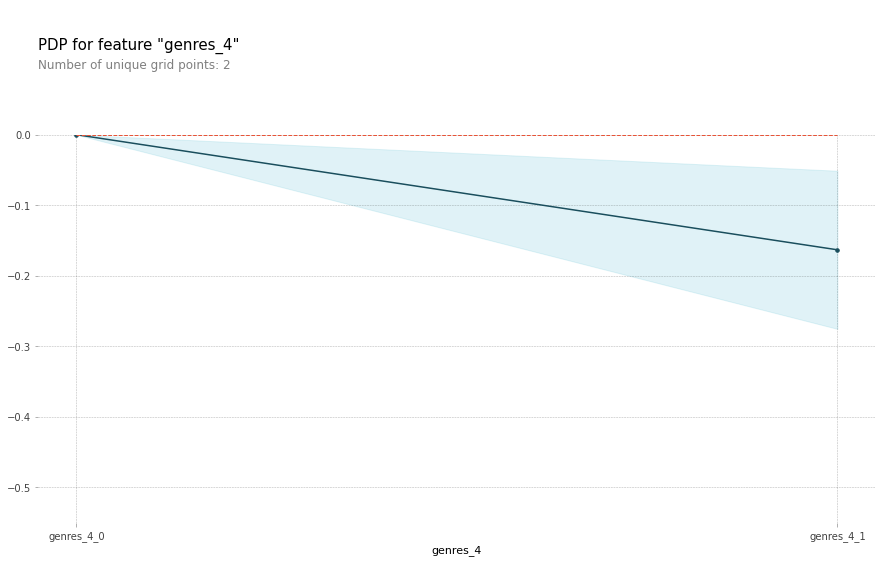

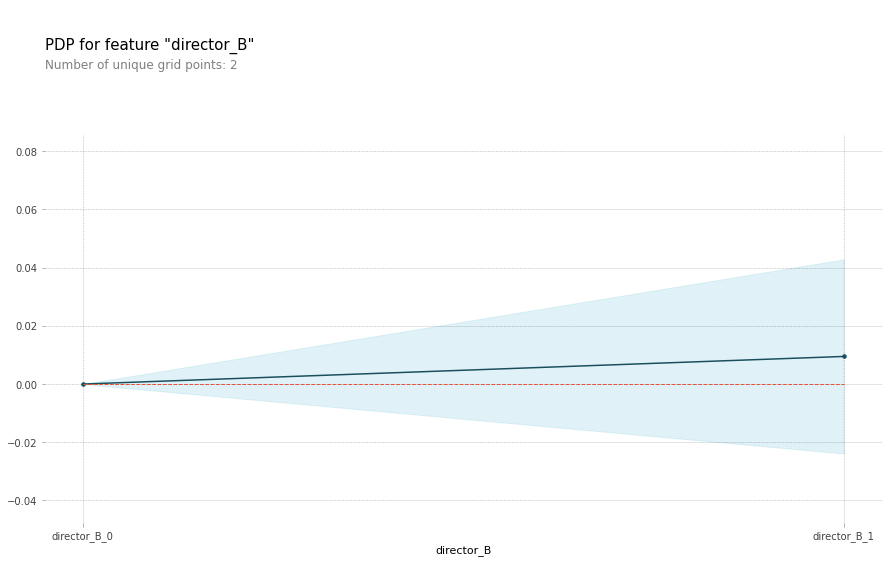

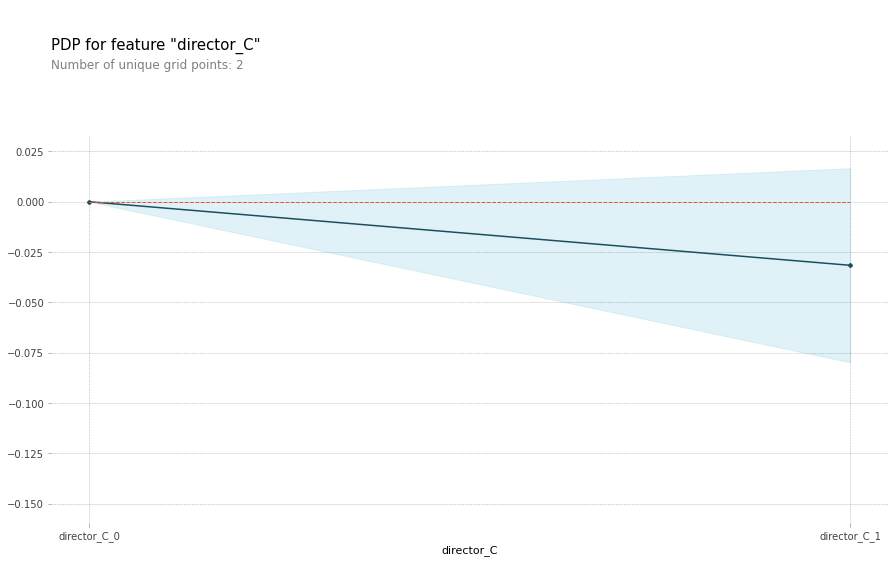

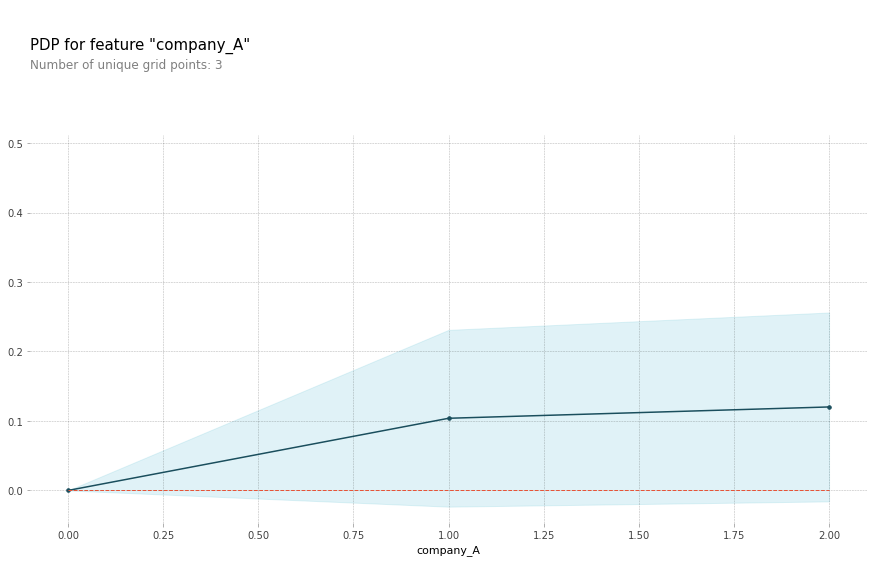

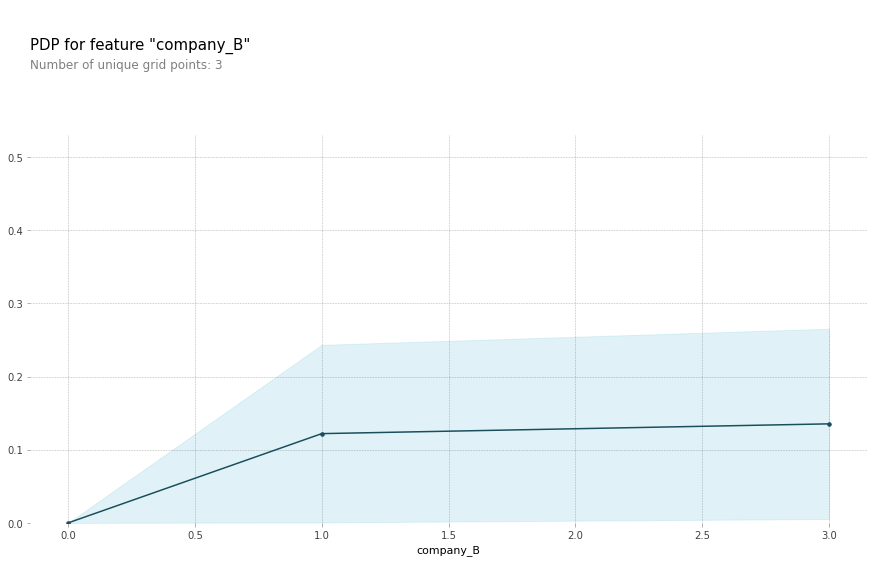

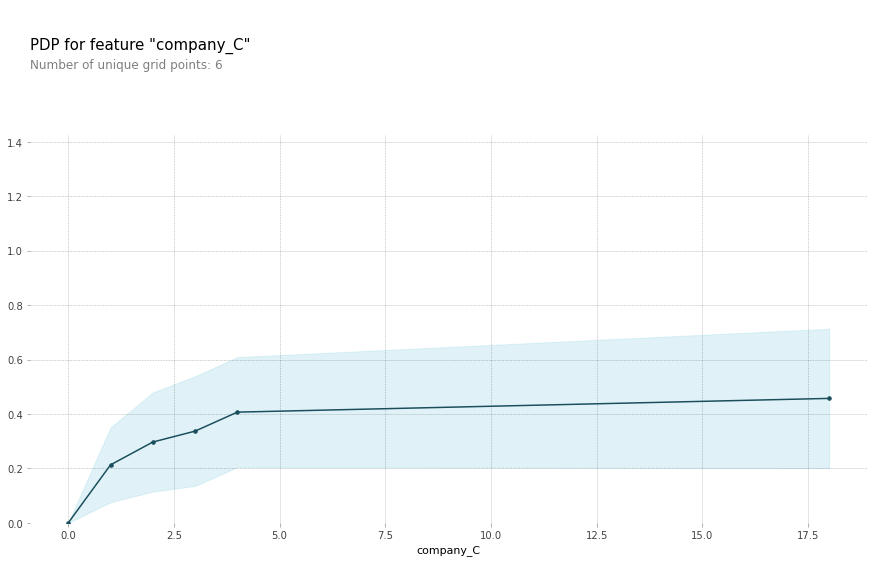

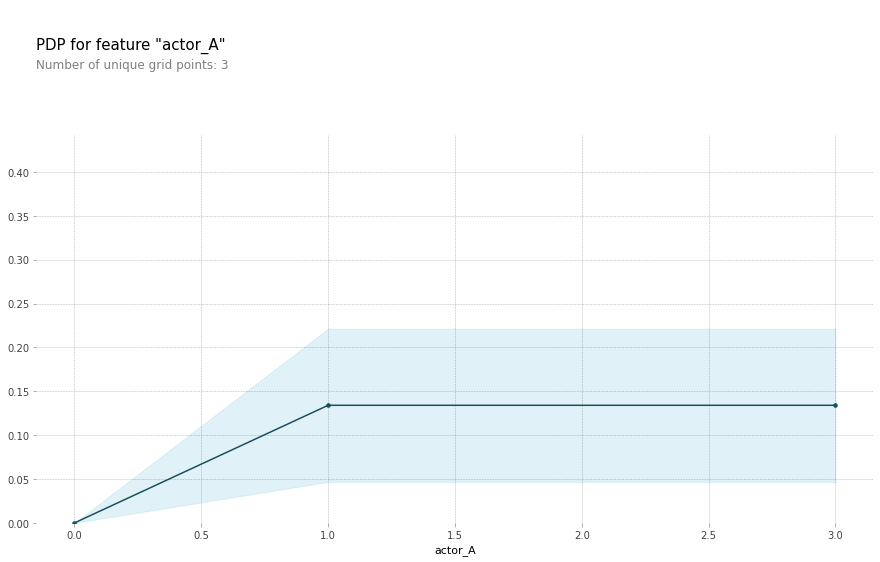

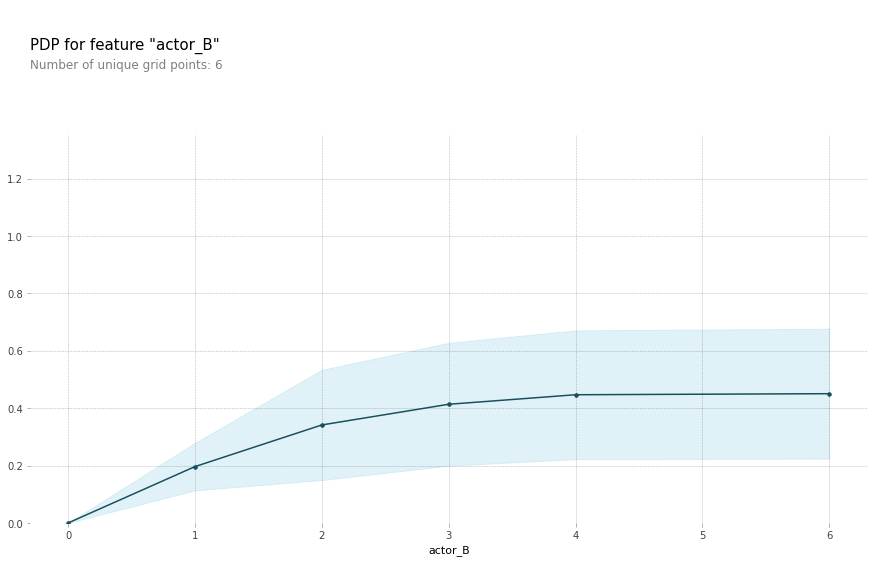

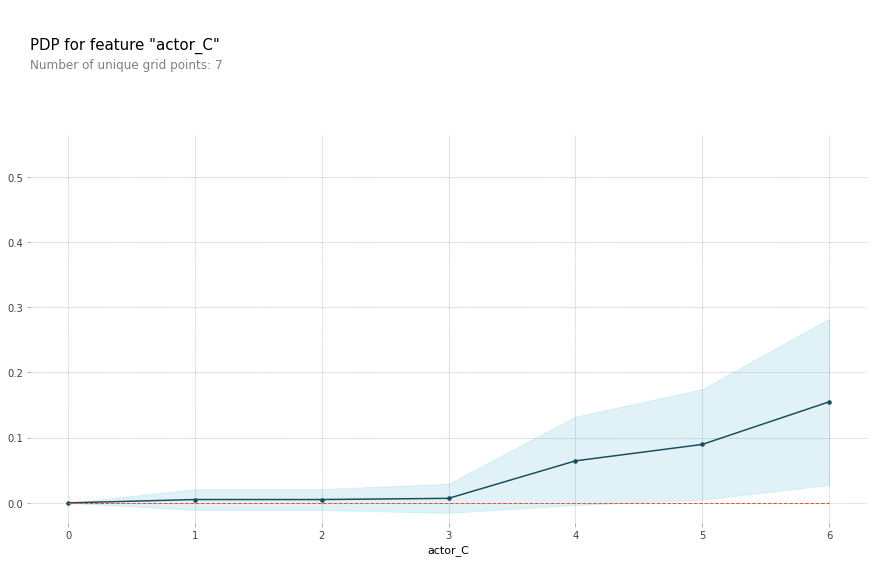

In [51]:
from pdpbox.pdp import pdp_isolate, pdp_plot

for i in features:
  isolated = pdp_isolate(
      model=boosting, 
      dataset=X_val_encoded, 
      model_features=X_val_encoded.columns, 
      feature=i
  )
  pdp_plot(isolated, feature_name= i);

In [55]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

In [56]:
feature = ['revenue', 'vote_average']

interaction = pdp_interact(
    model=boosting, 
    dataset=X_val_encoded,
    model_features=X_val.columns, 
    features=feature
)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


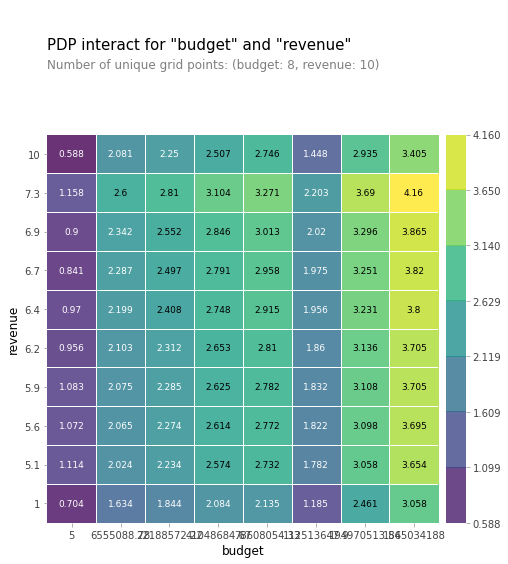

In [57]:

pdp_interact_plot(interaction, plot_type='grid', 
                  feature_names=features);

In [58]:
enc = OrdinalEncoder()
imp_mean = SimpleImputer()
scaler = StandardScaler()

X_train_imputed = imp_mean.fit_transform(X_train)
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_train_encoded = enc.fit_transform(X_train_scaled)
X_train_encoded.columns = features

X_val_imputed = imp_mean.transform(X_val)
X_val_scaled = scaler.transform(X_val_imputed)
X_val_encoded = enc.transform(X_val_scaled)
X_val_encoded.columns = features

X_test_imputed = imp_mean.transform(X_test)
X_test_scaled = scaler.transform(X_test_imputed)
X_test_encoded = enc.transform(X_test_scaled)
X_test_encoded.columns = features

In [59]:
import shap

processor = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_processed = processor.fit_transform(X_train)
X_val_processed = processor.transform(X_val)

eval_set = [(X_train_processed, y_train), 
            (X_val_processed, y_val)]

# XGBoost 분류기를 학습시킵니다. 클래스 비율을 맞추기 위해 scale_pos_weight= #Charged Off / # Fully Paid
model = XGBRegressor(n_estimators=1000, verbosity=0, n_jobs=-1)
model.fit(X_train_processed, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=0)

In [60]:
row = X_test_encoded.iloc[[21]]  # 중첩 brackets을 사용하면 결과물이 DataFrame입니다
row

budget       revenue   runtime  ...   actor_A   actor_B   actor_C
21 -0.648306 -1.067334e-16 -0.359489  ... -0.533847  0.479962 -0.187408

[1 rows x 18 columns]

In [61]:
explainer = shap.TreeExplainer(model)
row_processed = processor.transform(row)
shap_values = explainer.shap_values(row_processed)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values, 
    features=row, 
    link='logit' # SHAP value를 확률로 변환해 표시합니다.
)

In [62]:
shap.initjs()
shap_values = explainer.shap_values(X_test.iloc[:100])
shap.force_plot(explainer.expected_value, shap_values, X_test.iloc[:100])

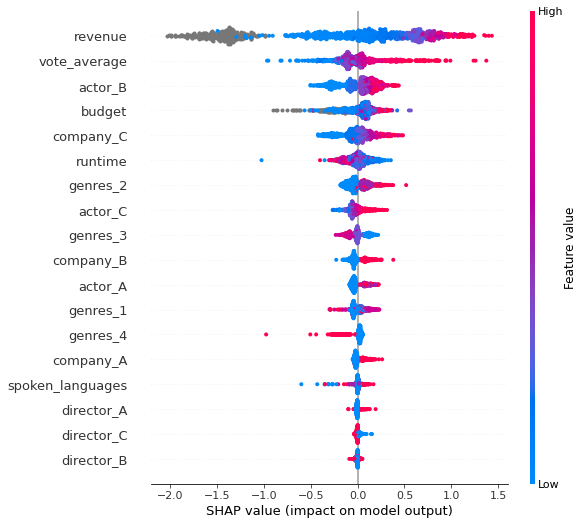

In [63]:
shap_values = explainer.shap_values(X_test.iloc[:3000])
shap.summary_plot(shap_values, X_test.iloc[:3000])

In [ ]:
y_pred = model.predict(X_val_processed)
r2_score(y_val, y_pred)

0.6903501297203936